# Import Libraries

Untuk memulainya, library sklearn yang diperlukan diimpor seperti yang ditunjukkan di bawah ini.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

# Dataset

Fungsi make_moons() digunakan dalam klasifikasi biner dan menghasilkan pola pusaran yang terlihat seperti dua bulan. Faktor noise untuk menghasilkan bentuk bulan dan jumlah sampel dapat dikontrol dengan bantuan parameter.

Pola yang dihasilkan ini dapat digunakan sebagai kumpulan data untuk contoh pengelompokan DBSCAN kita. Pada ilustrasi di bawah ini kita menghasilkan dataset moons dengan noise sedang.

Di bawah ini, kami membuat sampel 500 titik data dengan make_moons() dengan noise = 0.1 dan kemudian menggunakan ini untuk membuat pandas DataFrame untuk melihat dua kolom X1 dan X2.

In [2]:
X, y = make_moons(n_samples=500, noise=0.1)
df=pd.DataFrame(X,y)
df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
0,0.920524,0.279232
1,0.180045,-0.066439
1,-0.021632,0.021511
0,0.540397,0.935074
1,0.448969,-0.440331


Text(0, 0.5, '$x_2$')

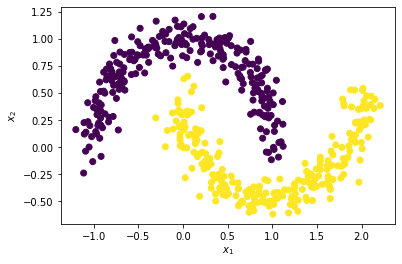

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Implementasi Sklearn DBSCAN Clustering dengan default parameters

Dalam contoh ini, dengan menggunakan parameter default dari fungsi pengelompokan Sklearn DBSCAN, algoritme kita tidak dapat menemukan klaster yang berbeda dan karenanya klaster tunggal dengan titik noise nol dikembalikan.

Kita perlu menyempurnakan parameter ini untuk membuat cluster yang berbeda.

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


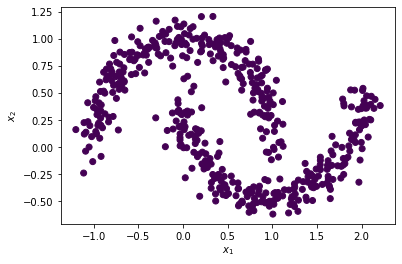

In [4]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster1.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

# Implementasi DBSCAN dengan eps = 0.1 dan min_samples = 8

Mari kita secara random memilih nilai parameter fungsi DBSCAN() sebagai eps=0.1 dan min_samples = 8 dan dapat dilihat bahwa algoritma kali ini menghasilkan terlalu banyak cluster.
Ini menghasilkan 14 cluster dan mengidentifikasi 88 poin sebagai noise dengan v_measure_score 0,35

Estimated no. of clusters: 9
Estimated no. of noise points: 95
v_measure = 0.4179203328299263


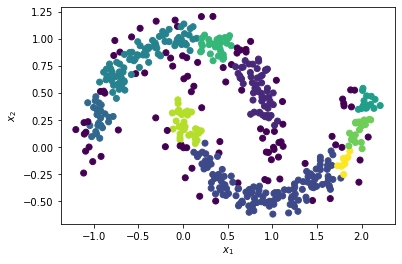

In [5]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

# Mencari nilai optimal dari Epsilon

Daripada bereksperimen dengan nilai epsilon yang berbeda, kita dapat menggunakan elbow poiny detection method untuk mendapatkan nilai epsilon yang sesuai.

Dalam pendekatan ini, jarak rata-rata antara setiap titik dan k nearest neighbors dihitung di mana k = MinPts yang dipilih. Kita kemudian memplot averages k-distances dalam urutan menaik pada k-distance graph

Nilai optimal untuk epsilon adalah titik dengan kelengkungan atau tikungan maksimum, yaitu pada kemiringan terbesar (greatest slope).

Text(0, 0.5, 'Distance')

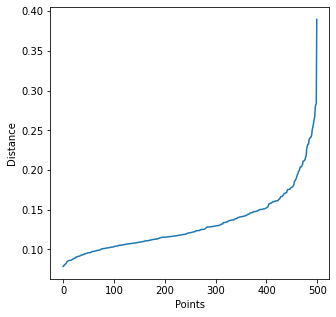

In [6]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

# Identifikasi Elbow Point

Untuk menentukan lokasi kelengkungan maksimum secara visual bisa jadi sulit. Kita dapat menggunakan library "kneed". Dengan menggunakan library ini, kita sekarang dapat melihat bahwa titik siku terletak pada nilai 0.163 dan ini adalah nilai epsilon optimal yang akan kita gunakan sekarang.

In [7]:
! pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0.16359968646789033


<Figure size 360x360 with 0 Axes>

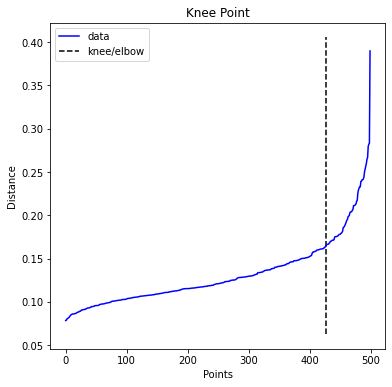

In [8]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

# Implementasi DBSCAN dengan Optimal value dari Epsilon = 0.163

Sekarang kita telah menurunkan nilai optimal epsilon sebagai 0.163 di atas, mari kita gunakan ini dalam algoritma DBSCAN di bawah ini.

Kali ini cukup terbukti bahwa clustering DBSCAN dilakukan dengan benar dengan 2 cluster yang dihasilkan dan hanya 8 titik noise. Bahkan v_measure_score bagus dengan nilai 0.93

Estimated no. of clusters: 2
Estimated no. of noise points: 8
v_measure = 0.9389888192956003


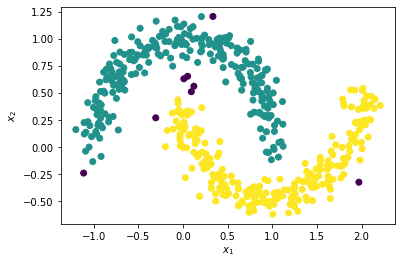

In [9]:
dbscan_cluster = DBSCAN(eps=0.163, min_samples=8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))